## Import Libraries and Data Files 

In [263]:
%run setup.ipynb
%run functions.ipynb

## Load Dataframe

In [87]:
# create dataframe of competitors from 2008-2023
total_dev_horses = merged_df.loc[(merged_df['Year'] <= 2023) &
                             (merged_df['Division'].str.contains('DHPSG|DHGP'))]

# drop duplicate USDF numbers so we only count each horse once
total_dev_horses = total_dev_horses.drop_duplicates(subset=['USDFNumber'])

total_dev_horses

,Year,Division,Horse,OverallPlacing,USDFNumber,OverallScore,Highest Level,CDI Competitor,Sire,Damsire,Country Bred,Breeder,Studbook,InternationalTeam,Team Made
17,2008,DHPSG,Sir Sinclair,12,1015413,62.947,Prix St. Georges,No,Lord Sinclair,Flemmingh,Netherlands,Monica Drohm,KWPN,No,NaN
40,2007,DHPSG,Rykaard,8,43275,63.083,I-1,Yes,Kimberley,Caruso,Netherlands,J. J. Knijp,KWPN,No,NaN
55,2008,DHPSG,Currency DC,10,1035693,63.859,Grand Prix,Yes,Clintino,Classiker,Germany,Zuchterhof Klatte,Oldenburg,No,NaN
62,2008,DHPSG,Wolkenwand,7,1019513,64.414,Grand Prix,No,Wolkenstein II,Walt Disney I,Germany,Bernd Meyer,Hanoverian,No,NaN
72,2008,DHPSG,Carnegie,14,39789,62.107,I-1,Yes,Contucci,Martini,USA,Zada Steidl,Oldenburg,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,2023,DHPSG,Jim,6,1129586,67.494,I-2,No,Ferdeaux,Spielberg,Netherlands,A.Soethout,KWPN,No,NaN
1192,2023,DHPSG,Furst Romanov,7,1144894,66.455,I-2,Yes,First Choice,Romanov,Denmark,Inge Bastian,Oldenburg,No,NaN
1194,2023,DHPSG,Giovanni-Bell,10,1157255,43.333,Prix St. Georges,No,Grand Galaxy Win,Maat I,Denmark,Tina Jepsen,Danish Warmblood,No,NaN
1195,2023,DHPSG,S Express,11,1158953,39.778,I-1,Yes,Sezuan,Sir Donnerhall I,Germany,Cathrin Schlemper,Westfalen,No,NaN


In [236]:
total_dev_horses.describe()

,Year,OverallPlacing,USDFNumber,OverallScore
count,283.000000,283.000000,2.830000e+02,283.000000
mean,2015.473498,7.399293,1.069723e+06,65.907360
std,4.770830,4.098901,1.535875e+05,5.482165
min,2007.000000,1.000000,3.978900e+04,26.490000
25%,2012.000000,4.000000,1.066954e+06,64.199500
50%,2016.000000,7.000000,1.095017e+06,66.606000
75%,2020.000000,11.000000,1.117540e+06,68.875000
max,2023.000000,17.000000,1.158953e+06,76.515000


In [88]:
# get number of horses in the Developing Horse divisions over all years of the program (2008-2023)
dev_horse_count = len(total_dev_horses)

print(f"The total number of horses competing over all years is {dev_horse_count}.")

The total number of horses competing over all years is 283.


## Analysis of Competitive Outcomes, 2008-2023
This year range was selected because all horses that competed in the Developing Prix St. Georges division in this time frame are old enough to have competed at the highest level, Grand Prix (minimum age allowed with both USEF and FEI is 8, although it is uncommon for a horse that young to be competing at that level).

### Breakdown of Developing Horse Division Competitors by Highest Level of Competition Achieved

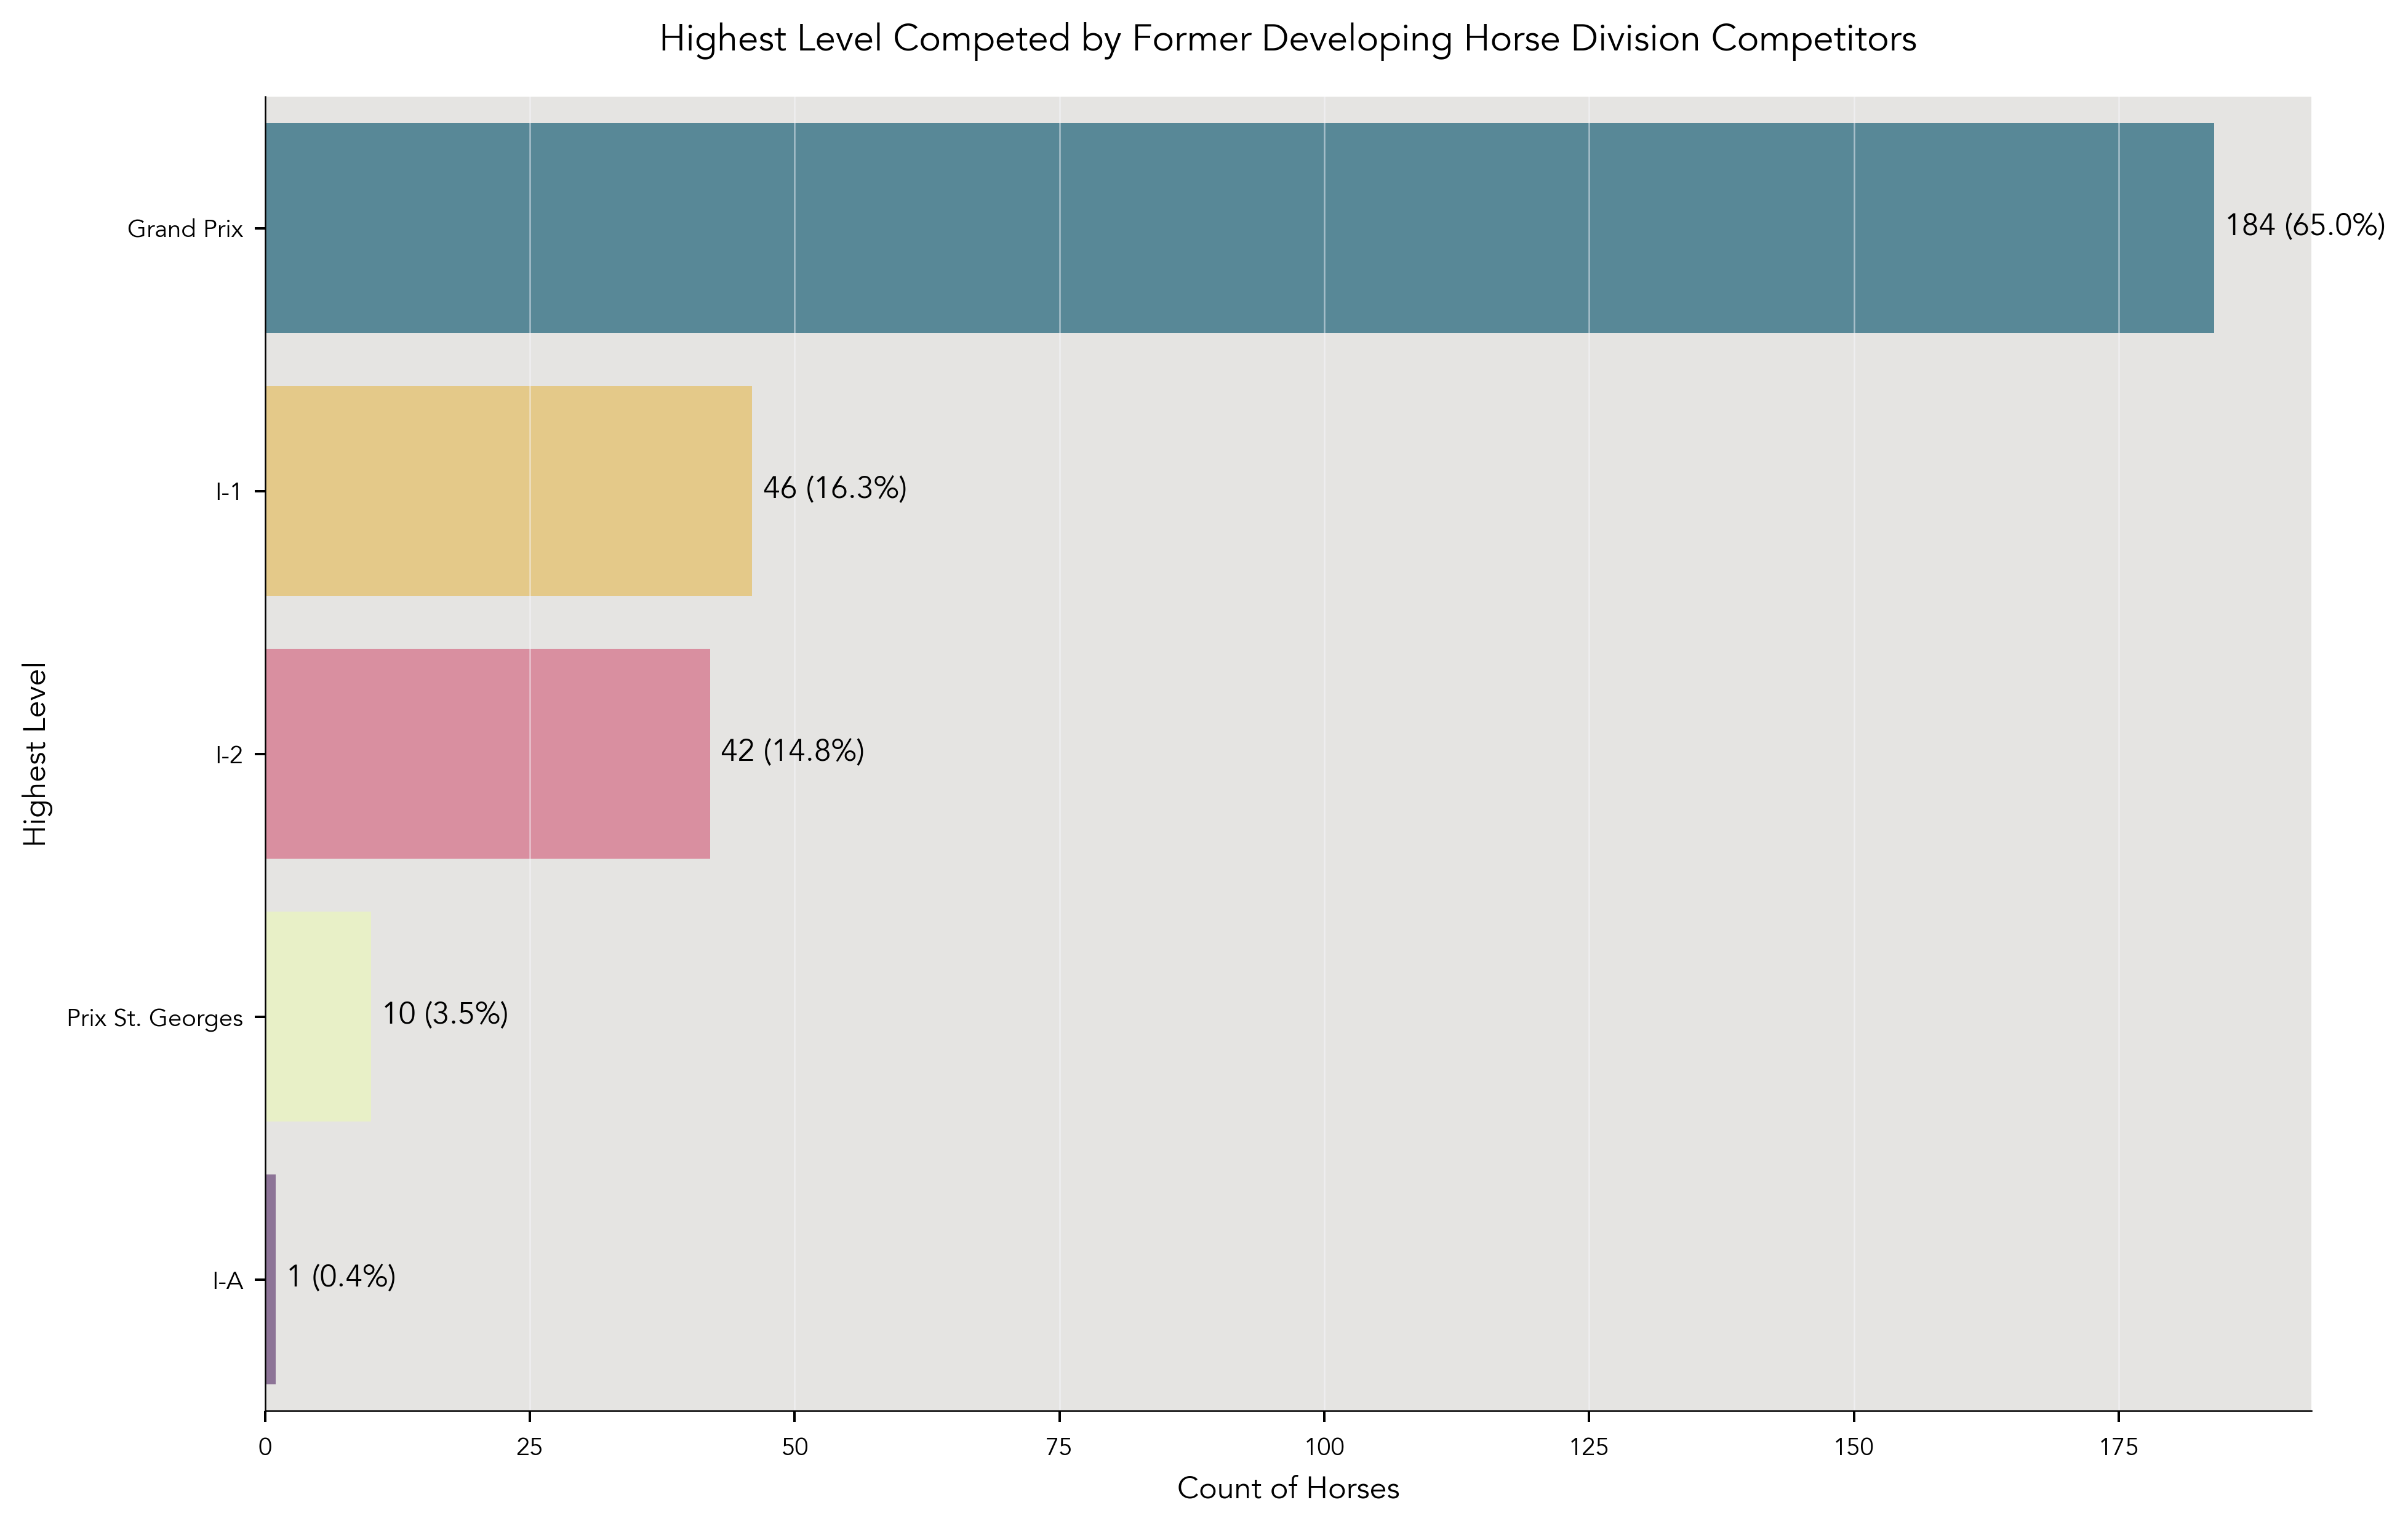

In [97]:
# create a countplot to display the breakdown of highest level competed

# set figure size
ax = plt.subplots(figsize=(11, 7))

# set counplot options
ax = sns.countplot(
   y = 'Highest Level',
   data = total_dev_horses,
   alpha = 0.7,
   order = total_dev_horses['Highest Level'].value_counts().index
)

# add annotation for count and percentage of each level
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_width(), p.get_width()*100/dev_horse_count), (p.get_x() + p.get_width() + 1, p.get_y() + .4), ha = 'left', va = 'center')

# set title, xlabel and ylabel
plt.title('Highest Level Competed by Former Developing Horse Division Competitors')
plt.xlabel('Count of Horses')
plt.ylabel('Highest Level')

# save and show figure
plt.tight_layout()
plt.savefig('images/dh-highest-level-breakdown.png')
plt.show()

### CDI (Concours de Dressage International) Developing Horse Division Competitor Statistics

In [90]:
# get the horses that have competed in at least one CDI (any level other than Young Horse divisions)
dev_cdi_horses = total_dev_horses.loc[(total_dev_horses['CDI Competitor'] == 'Yes')]

# count the CDI horses by USDF number
dev_cdi_count = dev_cdi_horses['USDFNumber'].nunique()

print(f"The number of CDI competitors is {dev_cdi_count}.")

The number of CDI competitors is 191.


In [91]:
# get the overall percentage of horses that competed in at least one CDI 
dev_cdi_percentage = (dev_cdi_count / dev_horse_count) * 100

# round the percentage
dev_cdi_percentage = round(dev_cdi_percentage, 2)

# print to console
print(f"The percentage of CDI competitors is {dev_cdi_percentage}%")

The percentage of CDI competitors is 67.49%


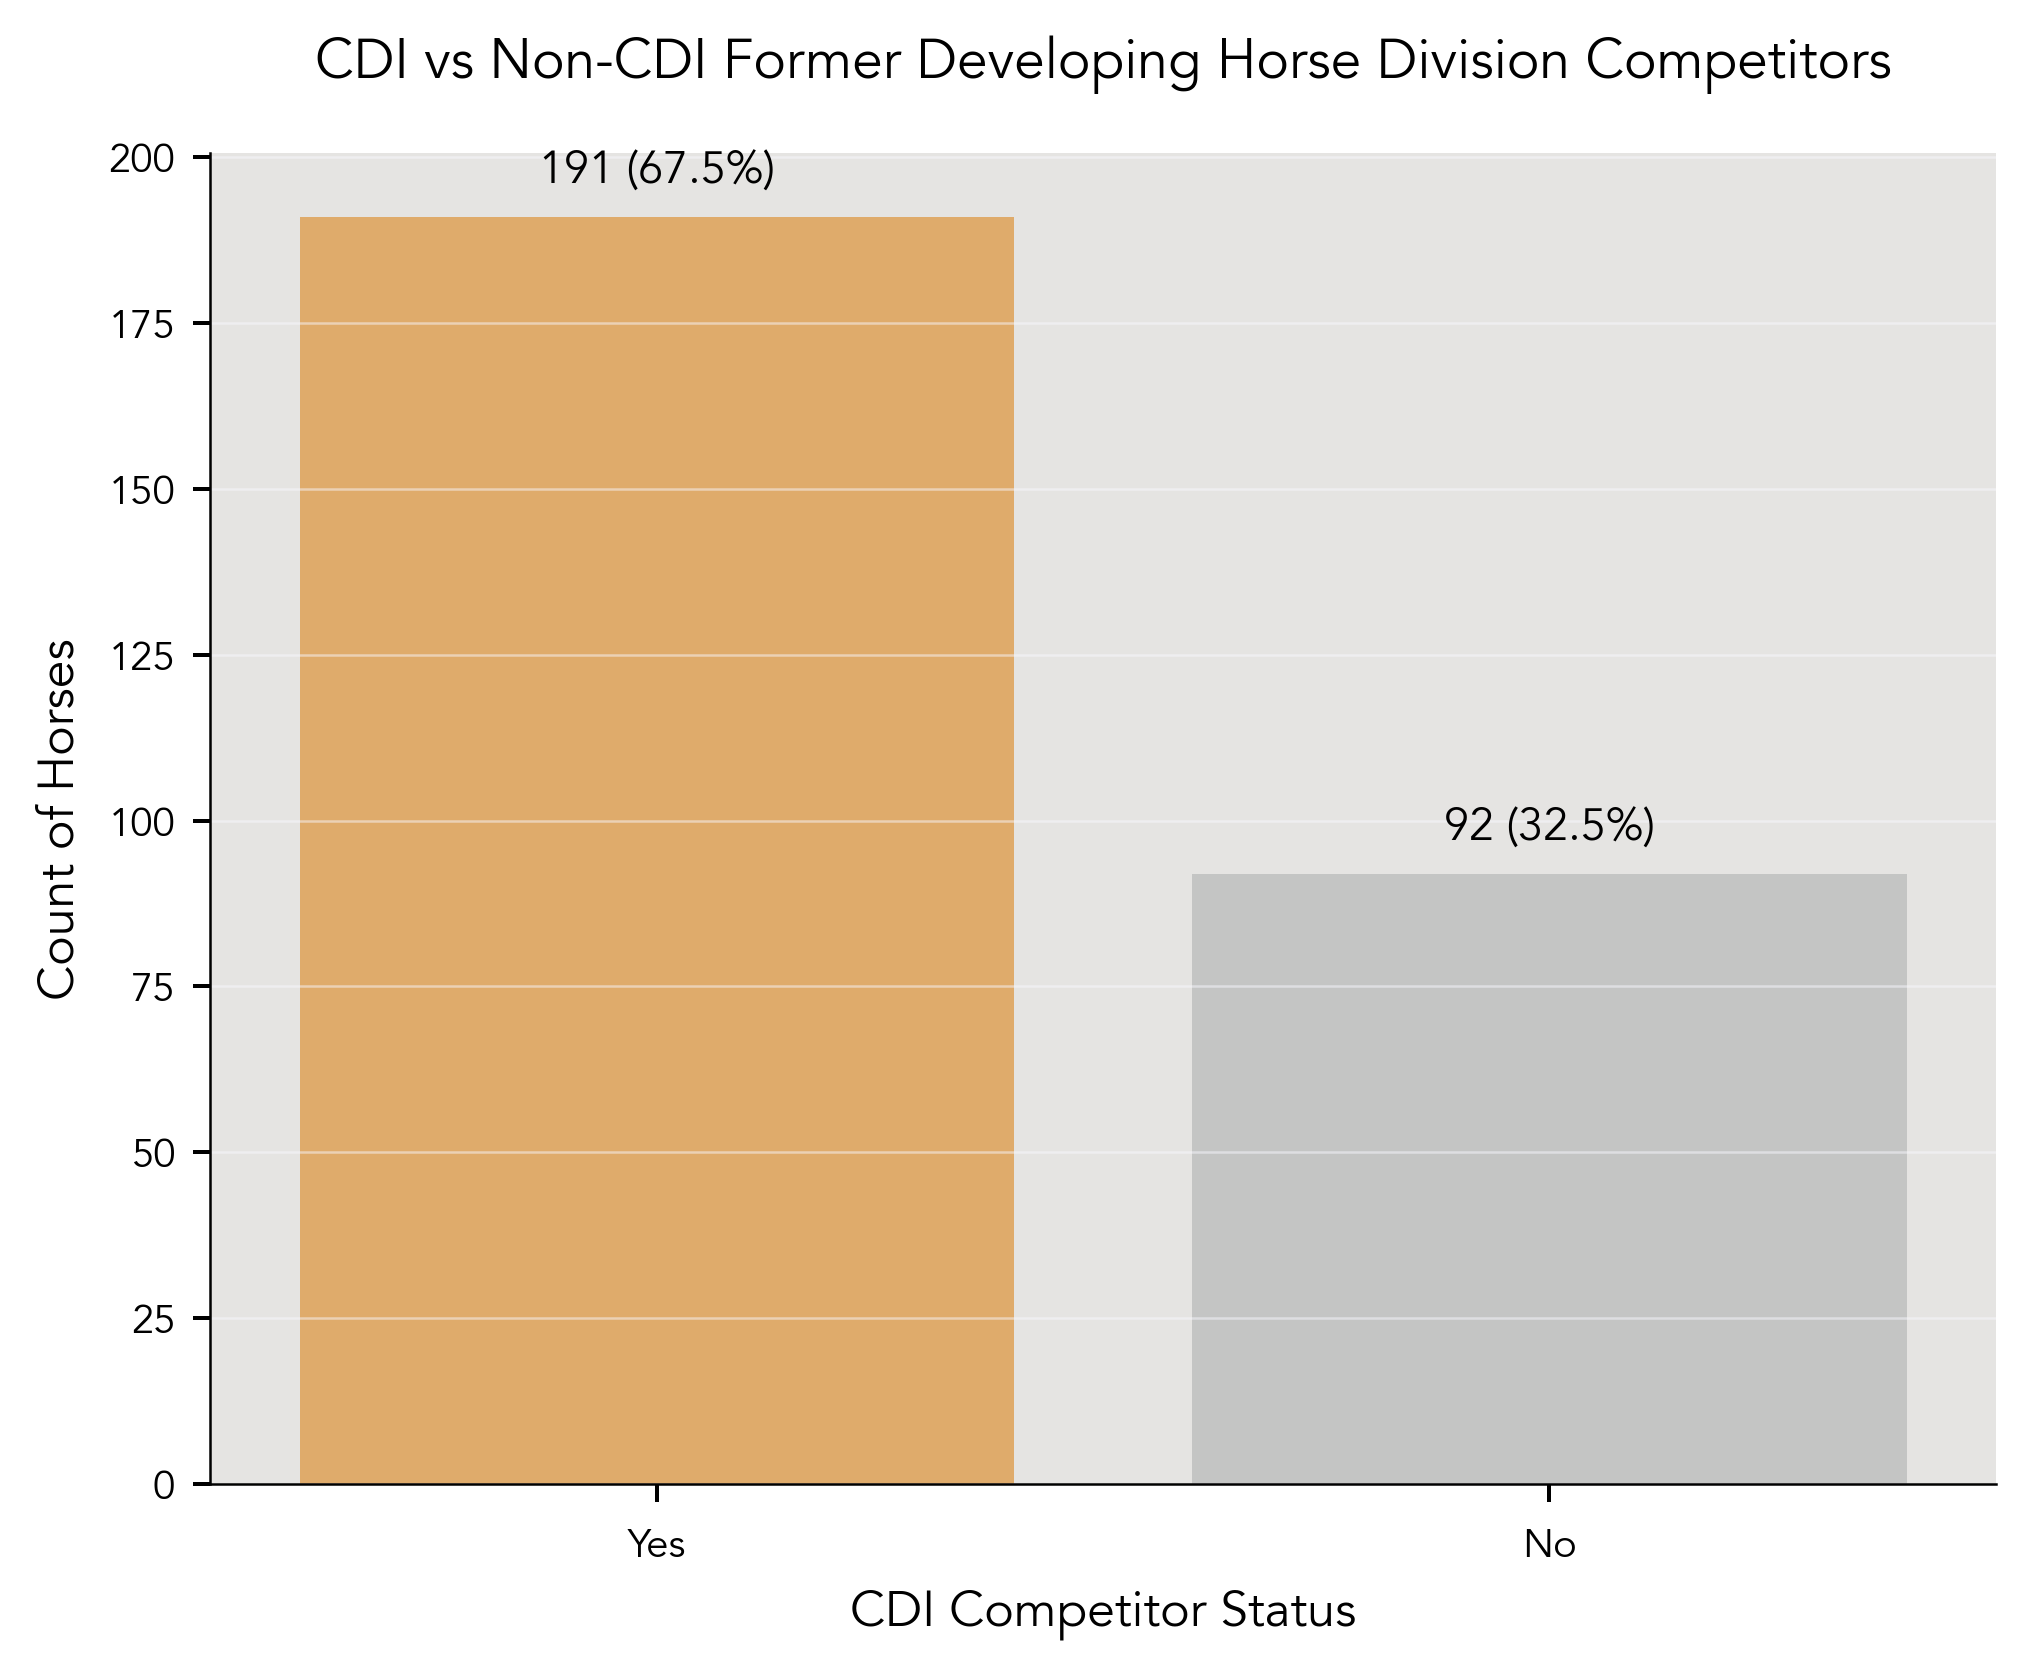

In [262]:
#  create a countplot to visualize CDI vs non-CDI horse data

# set options for countplot
ax = sns.countplot(
   x = 'CDI Competitor',
   data = total_dev_horses,
   palette = ['#f8961e', '#b7b8b8'],
   alpha = .7,
   order = total_dev_horses['CDI Competitor'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/dev_horse_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('CDI vs Non-CDI Former Developing Horse Division Competitors')
plt.xlabel('CDI Competitor Status')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/dh-cdi-competitors.png')
plt.show()

### Developing Horse Division International Team Horse Statistics

In [95]:
# select the horses that went on to make an international team (Pan American, World Equestrian, or Olympic Games) 
dev_team_df = total_dev_horses[(total_dev_horses['InternationalTeam'] == 'Yes')]


# drop unnecessary columns
dev_team_df = dev_team_df.drop(columns =['Year', 'Division', 'OverallPlacing', 'OverallScore','CDI Competitor', 'USDFNumber', 'Highest Level', 'InternationalTeam'])

# show dataframe
dev_team_df

# print to markdown
#print(dev_team_df.to_markdown())

,Horse,Sire,Damsire,Country Bred,Breeder,Studbook,Team Made
167,Grandioso,Grosso Z,Palisandergrund,Germany,Willi Hillebrecht,Westfalen,Pan American Games
333,Rosevelt,Rotspon,Lauries Crusador xx,Germany,Henry Peters,Hanoverian,Olympic Games
400,Sanceo,San Remo,Ramiro's Son II,Germany,Gerhard Dustmann,Hanoverian,Olympic Games and Pan American Games
635,Lucky Strike,Lord Laurie,His Highness,Germany,Monika Hartwitch,Hanoverian,Pan American Games
783,Faro SQF,Fidertanz,Rotspon,USA,Star Quarry Farm,Hanoverian,Pan American Games
1119,Jane,Desperado,Metall,Netherlands,H.J. Van Oort,KWPN,Olympic Games


In [73]:
# get the percentage of horses that made an international team

# get the count of team horses
dev_team_count = len(dev_team_df)

# calculate the percentage
dev_team_percentage = (dev_team_count / dev_horse_count) * 100

# round the percentage
dev_team_percentage = round(dev_team_percentage, 1)

# print to console
print(f"The percentage of horses that made an international team is {dev_team_percentage}%")

The percentage of horses that made an international team is 2.1%


In [253]:

dev_scores_df = merged_df.loc[(merged_df['Year'] <= 2023) &
                            (merged_df['Division'].str.contains('DHPSG|DHGP')) & (merged_df['Highest Level'] == 'Grand Prix')].copy()


# new column with result of function  
dev_scores_df['ScoreRank'] = dev_scores_df['OverallScore'].apply(dh_check_score)

# sort values and drop duplicates, this way ensures if a horse scored both above and below 65.9 that we keep the higher score
dev_scores_df = dev_scores_df.sort_values('ScoreRank').drop_duplicates(subset='USDFNumber', keep='first')

#print(dev_scores_df.to_markdown())


dev_gp_count = len(dev_scores_df)

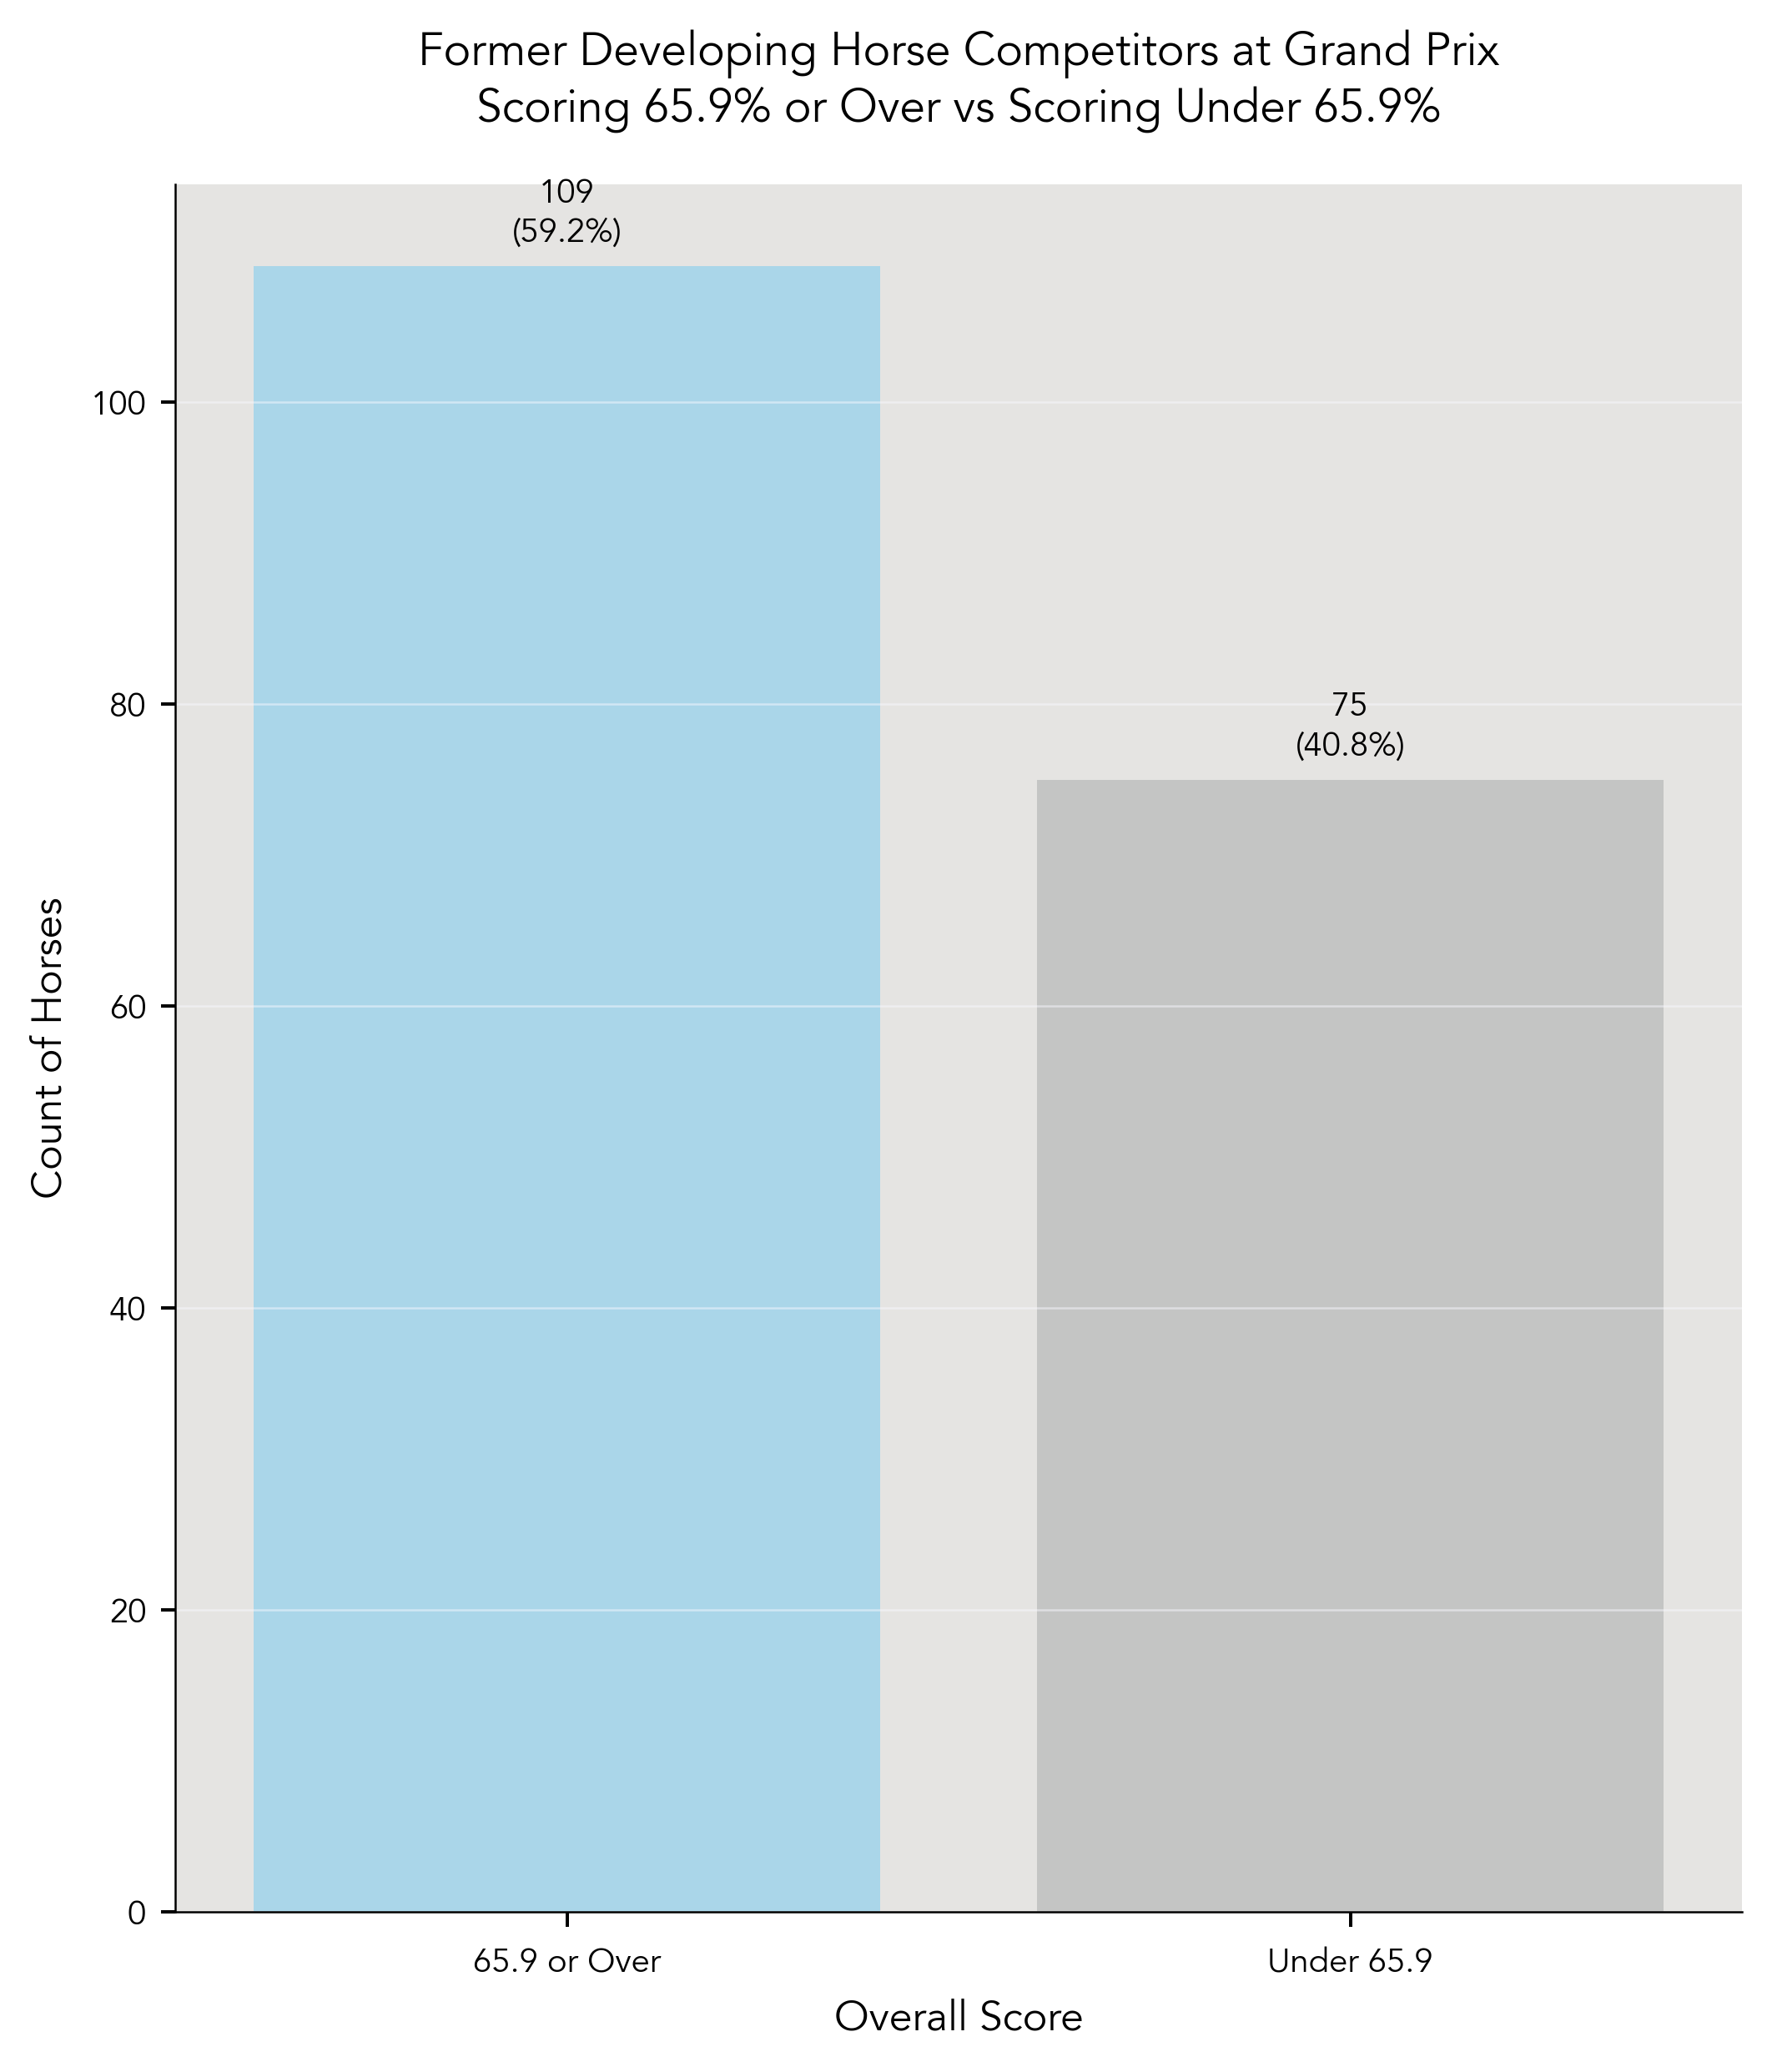

In [264]:
ax = plt.subplots(figsize=(6, 7))

# set options for countplot
ax = sns.countplot(
   x = 'ScoreRank',
   data = dev_scores_df,
   palette = ['#83D7FC', '#b7b8b8'],
   alpha = .7,
   order = dev_scores_df['ScoreRank'].value_counts().index
)

# add annotation for count and percentage of each score group
for p in ax.patches:
    ax.annotate("{:0,.0f}\n({:,.1f}%)".format(p.get_height(), p.get_height()*100/dev_gp_count), (p.get_x() + p.get_width()/2, p.get_height() + 1), ha = 'center', va = 'bottom', fontsize=8)

# set title, xlabel, and ylabel
ax.set_title('Former Developing Horse Competitors at Grand Prix\nScoring 65.9% or Over vs Scoring Under 65.9%')
plt.ylabel('Count of Horses')
plt.xlabel('Overall Score')

# save and show figure
plt.tight_layout()
plt.savefig('images/dh-grand-prix-by-overall-score.png')
plt.show()

In [245]:
chi_dev_scores_df = merged_df.loc[(merged_df['Year'] <= 2023) &
                            (merged_df['Division'].str.contains('DHPSG|DHGP'))].copy()


# new column with result of function  
chi_dev_scores_df['IsGP'] = chi_dev_scores_df['Highest Level'].apply(gp_or_no)    

# new column with result of function  
chi_dev_scores_df['ScoreRank'] = chi_dev_scores_df['OverallScore'].apply(check_score)

# sort values and drop duplicates, this way ensures if a horse scored both above and below 65.9 that we keep the higher score
chi_dev_scores_df = chi_dev_scores_df.sort_values('ScoreRank').drop_duplicates(subset='USDFNumber', keep='first')

#print(chi_dev_scores_df.to_markdown())

In [78]:
# create contingency table
contingency_table = pd.crosstab(chi_dev_scores_df['ScoreRank'], chi_dev_scores_df['IsGP'])

print(contingency_table)

# get chi-square stat, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print chi-square stat, p-value, degrees of freedom, and expected frequencies
print("Chi-Square statistic:", chi2_stat)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

# interpret p-value
alpha = 0.05
print("p value is " + str(p_val))
if p_val <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

IsGP          No  Yes
ScoreRank            
65.9 or Over  66  109
Under 65.9    33   75
Chi-Square statistic: 1.2064753433518522
P-Value: 0.2720312962380293
Degrees of Freedom: 1
Expected Frequencies: [[ 61.21908127 113.78091873]
 [ 37.78091873  70.21908127]]
p value is 0.2720312962380293
Independent (H0 holds true)


### Developing Horse and Young Horse Competitors 

In [234]:
# get the horses that competed in at least one Young Horse division and one Developing Horse division

# set variables for each division
yh = {'USEF4', 'FEI5', 'FEI6'}
dh = {'DHPSG', 'DHGP'}

# create dataframe
yh_and_dh = merged_df.loc[((merged_df['Year'] <= 2023))].copy()

# group by USDF number
g = yh_and_dh.groupby('USDFNumber')

# create new column with result 
yh_and_dh['BothDivisions'] = (g['Division'].transform(lambda x: x.isin(yh).any()))&(g['Division'].transform(lambda x: x.isin(dh).any()))
yh_and_dh['BothDivisions'] = yh_and_dh['BothDivisions'].replace({True: 'Yes', False: 'No'})
yh_and_dh = yh_and_dh.drop_duplicates(subset=['USDFNumber'], keep='last')
yh_and_dh = yh_and_dh.loc[(yh_and_dh['Division'].str.contains('DHPSG|DHGP'))]

print(yh_and_dh.to_markdown())


# get a count of all horses that competed in both divisions
yh_and_dh_count = len(yh_and_dh.loc[(yh_and_dh['BothDivisions'] == 'Yes')])

# get all horses that competed in both divisions and went on to compete at Grand Prix
yh_and_dh_gp = yh_and_dh.loc[(yh_and_dh['Highest Level'] == 'Grand Prix') & (yh_and_dh['BothDivisions'] == 'Yes')]


# get a count of all horses that competed in both divisions and went on to compete at Grand Prix
yh_and_dh_gp_count = len(yh_and_dh_gp)

# get percentage of horses that competed in both divisions
yh_dh_percentage = (yh_and_dh_count / dev_horse_count) * 100
yh_dh_percentage = round(yh_dh_percentage, 1)

# get percentage of horses that competed in both divisions that went on to Grand Prix
yh_dh_gp_percentage = (yh_and_dh_gp_count / yh_and_dh_count) * 100
yh_dh_gp_percentage = round(yh_dh_gp_percentage, 1)

#print(yh_and_dh.to_markdown())

print(f"There were {yh_and_dh_count} horses ({yh_dh_percentage}%) that competed in at least one Young Horse division and one Developing Horse division.")
print(f"There were {yh_and_dh_gp_count} horses ({yh_dh_gp_percentage}%) that competed in at least one Young Horse division and one Developing Horse division, and went on to compete at Grand Prix.")


|      |   Year | Division   | Horse                       |   OverallPlacing |   USDFNumber |   OverallScore | Highest Level    | CDI Competitor   | Sire                  | Damsire                    | Country Bred   | Breeder                               | Studbook                                                | InternationalTeam   | Team Made                            | BothDivisions   |
|-----:|-------:|:-----------|:----------------------------|-----------------:|-------------:|---------------:|:-----------------|:-----------------|:----------------------|:---------------------------|:---------------|:--------------------------------------|:--------------------------------------------------------|:--------------------|:-------------------------------------|:----------------|
|   17 |   2008 | DHPSG      | Sir Sinclair                |               12 |      1015413 |         62.947 | Prix St. Georges | No               | Lord Sinclair         | Flemmingh                  | Net

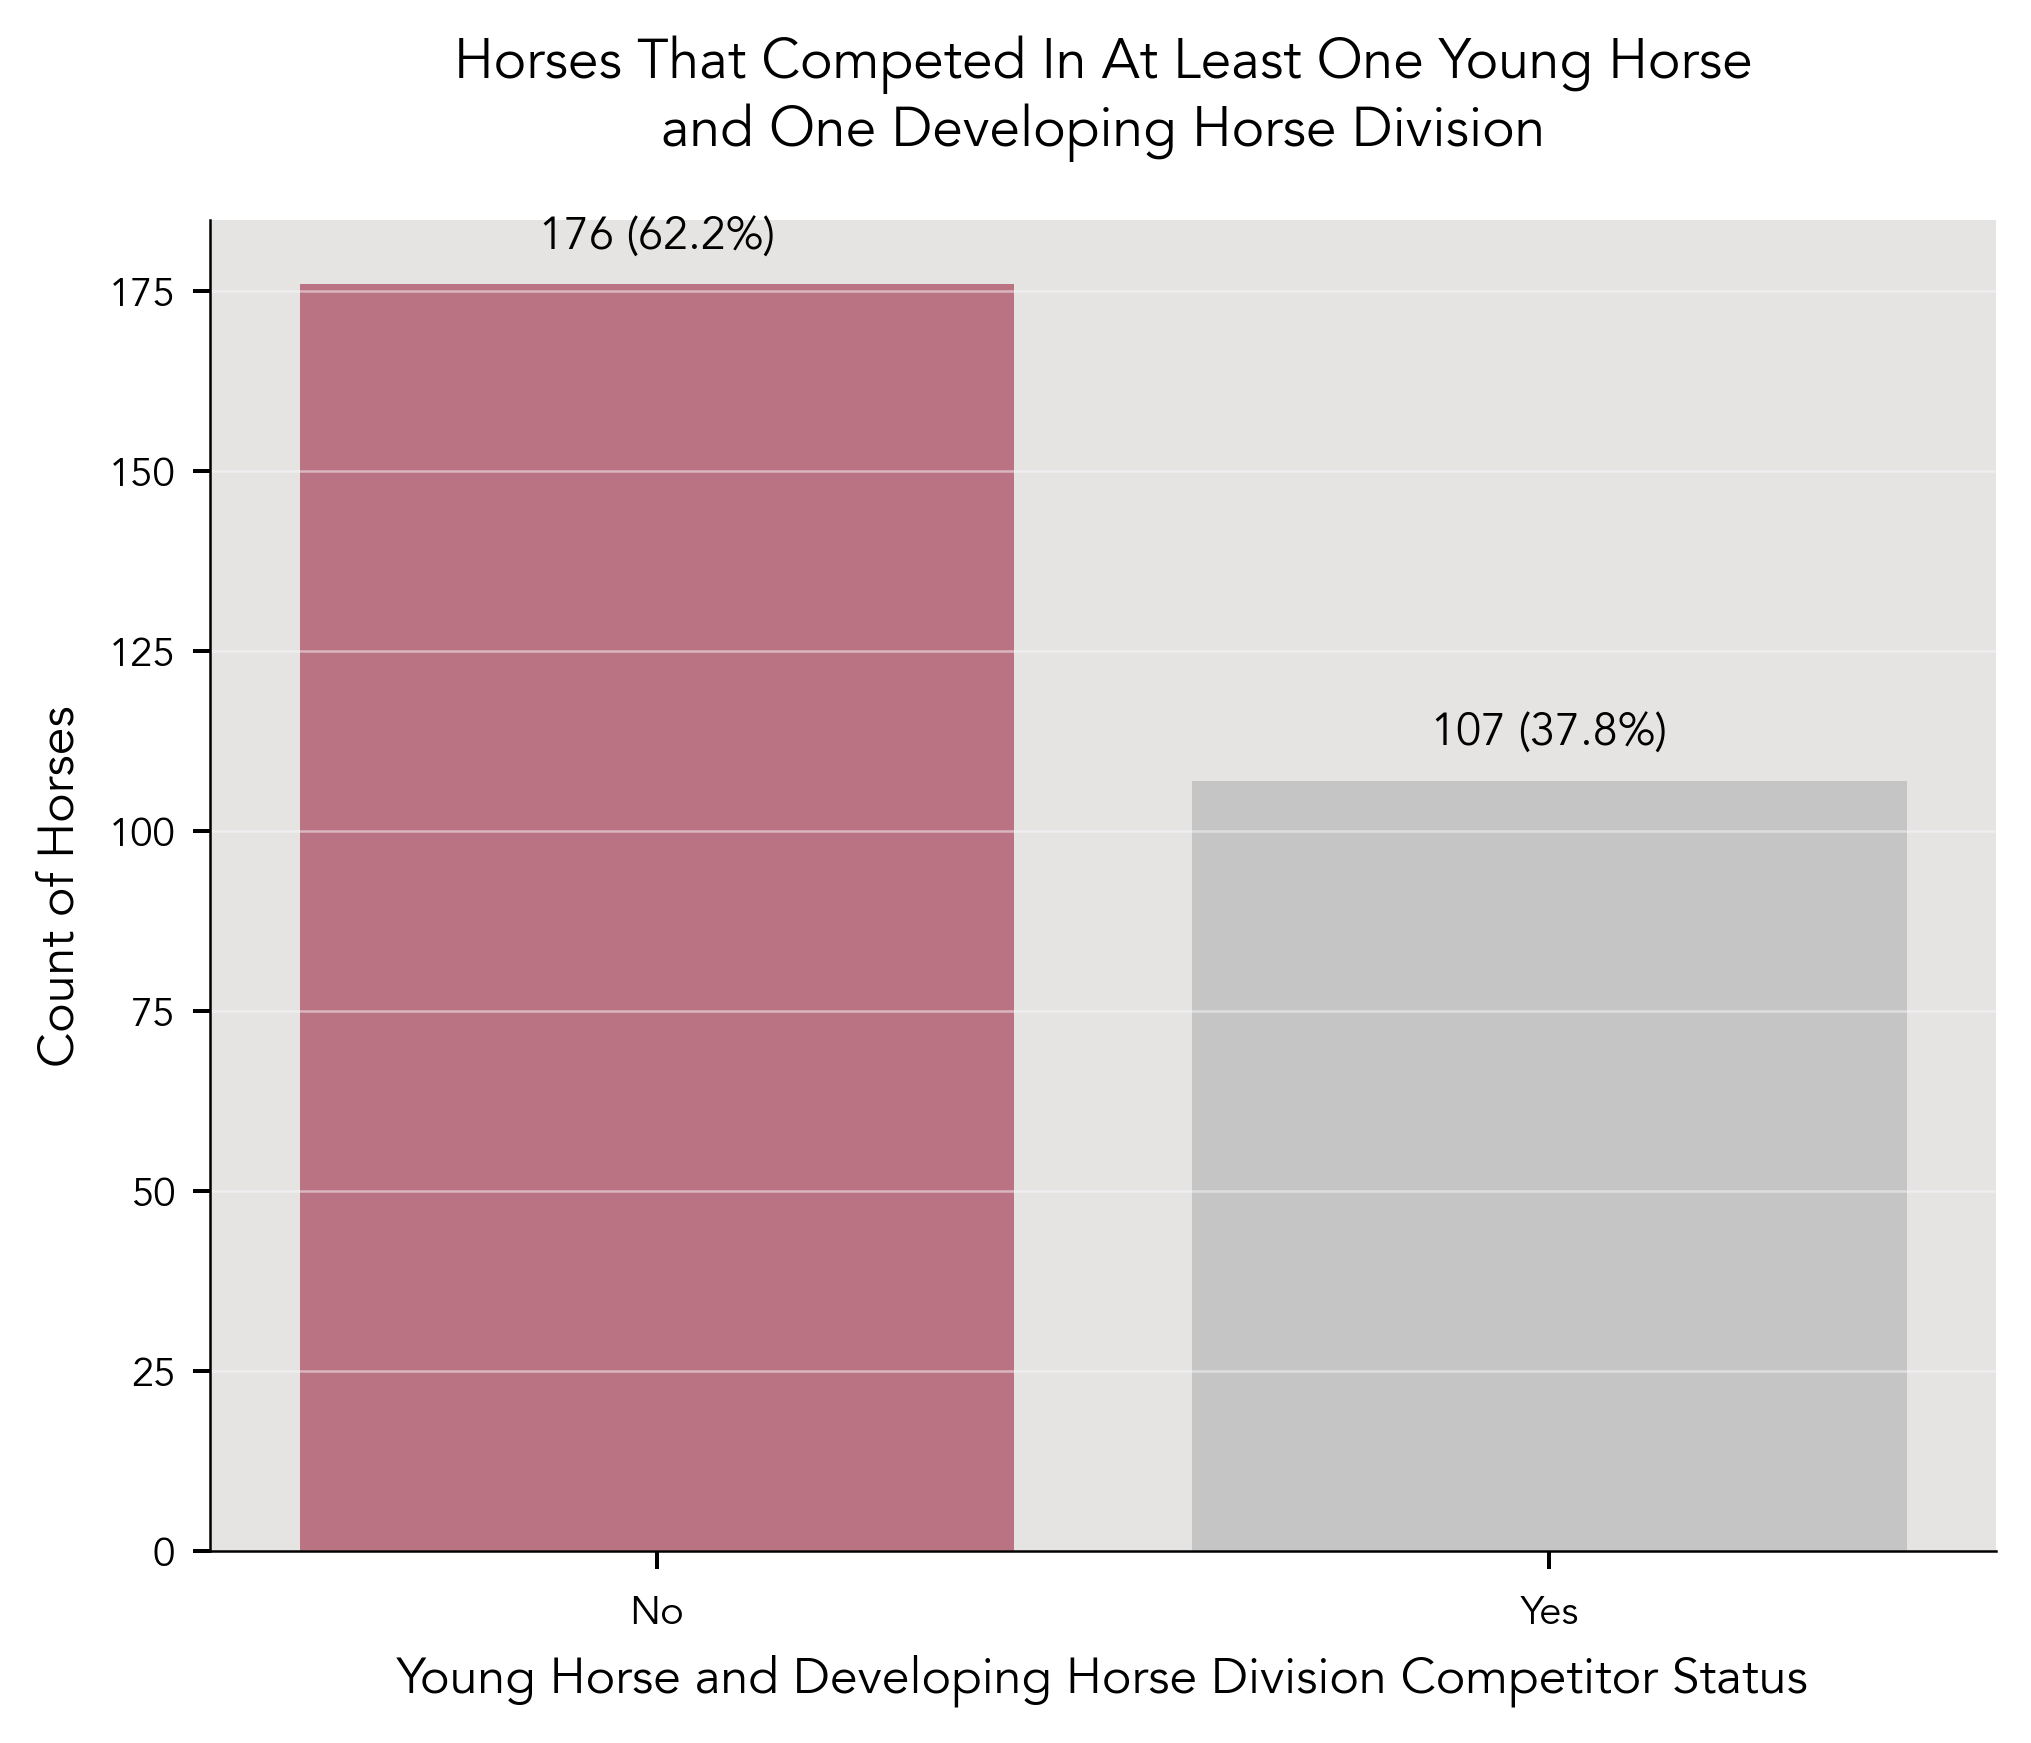

In [260]:
#  create a countplot to visualize horses that competed in both divisions

# set options for countplot
ax = sns.countplot(
   x = 'BothDivisions',
   data = yh_and_dh,
   palette = ['#ba324f', '#b7b8b8'],
   alpha = .7,
   order = yh_and_dh['BothDivisions'].value_counts().index
)

# add annotation for count and percentage of CDI vs non-CDI 
for p in ax.patches:
    ax.annotate("{:0,.0f} ({:,.1f}%)".format(p.get_height(), p.get_height()*100/dev_horse_count), (p.get_x() + p.get_width()/2, p.get_height() + 3), ha = 'center', va = 'bottom', fontsize=9)

# set title, xlabel, and ylabel
plt.title('Horses That Competed In At Least One Young Horse\nand One Developing Horse Division')
plt.xlabel('Young Horse and Developing Horse Division Competitor Status')
plt.ylabel('Count of Horses')

# save and show figure
plt.savefig('images/yh-and-dh-competitors.png')
plt.show()